In [1]:
import random
import time
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class Point:
    x: float
    y: float

    def __init__(self, point: (float, float)):
        self.x, self.y = point


class LinearBounds:
    lower: float
    higher: float

    def __init__(self, lower: float, higher: float):
        self.lower = lower
        self.higher = higher

    def length(self) -> float:
        return self.higher - self.lower

    def get_random_value(self) -> float:
        return random.uniform(self.lower, self.higher)


class Bounds:
    x: LinearBounds
    y: LinearBounds

    def __init__(self, x: LinearBounds, y: LinearBounds):
        self.x = x
        self.y = y

    def area(self) -> float:
        return self.x.length() * self.y.length()

    def get_random_point(self) -> Point:
        return Point((self.x.get_random_value(), self.y.get_random_value()))

In [3]:
def getRealIntegral(f, bounds: LinearBounds) -> float:
    return np.pi

In [4]:
def getIsInside(p: Point) -> bool:
    if p.x**2 + p.y**2 <= 1:
        return True
    return False

In [5]:
def function(x: float) -> float:
    return np.sqrt(1 - x**2)

bounds = Bounds(LinearBounds(-1.25, 1.25), LinearBounds(-1.25, 1.25))

/tmp/ipykernel_2674/2110725246.py:2: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(1 - x**2)


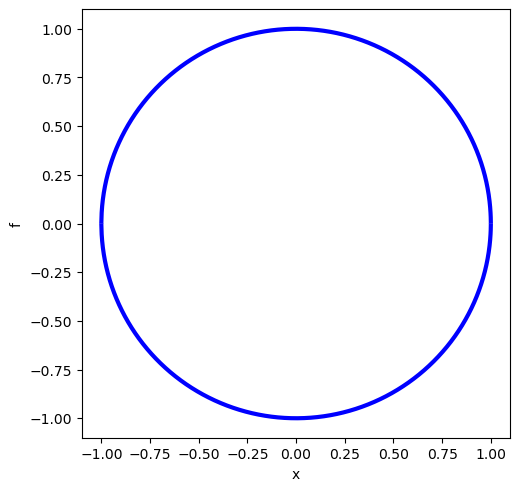

In [6]:
fig, axs = plt.subplot_mosaic([['linear-linear']], layout='constrained')
ax = axs['linear-linear']
ax.set_xscale('linear')
ax.set_yscale('linear')
ax.set_xlabel('x')
ax.set_ylabel('f')
ax.set_box_aspect(1)
samples = np.linspace(bounds.x.lower, bounds.x.higher, 5000)

ax.plot(samples, function(samples), color="blue", linewidth=3)
ax.plot(samples, -function(samples), color="blue", linewidth=3)

The approximated Integral of the function is: 3.15625
The real Integral of the function is: 3.14159
That's an error of 0.01 or 0.46656% 
And the whole thing took 0.50002 Seconds for 1000 samples


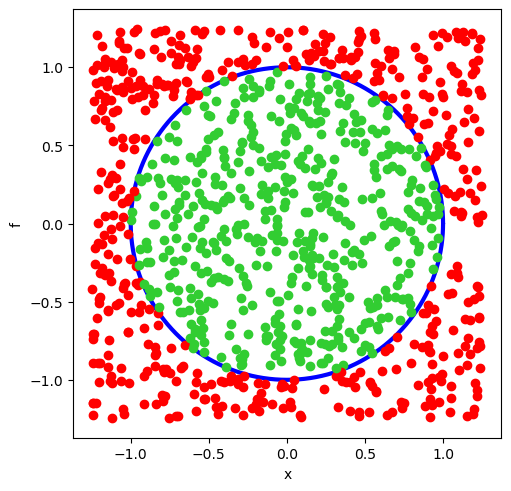

In [7]:
startTime = time.time()
pointsInside: int = 0
samples: int = 10**3

for i in range(samples):
    toTestPoint = bounds.get_random_point()
    if getIsInside(toTestPoint):
        pointsInside += 1
        ax.plot(toTestPoint.x, toTestPoint.y, "o", color="limegreen")
    else:
        ax.plot(toTestPoint.x, toTestPoint.y, "ro")

integral = (pointsInside / samples) * bounds.area()
print(f"The approximated Integral of the function is: {integral:.5f}")

real_value: float = getRealIntegral(function, bounds.x)
print(f"The real Integral of the function is: {real_value:.5f}")

error: float = abs(real_value-integral)
print(f"That's an error of {error:.2f} or {(error/real_value)*100:.5f}% ")

print(f"And the whole thing took {time.time()-startTime:.5f} Seconds for {samples} samples")

fig